Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

The key features can be found by checking the correlation between the features.

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv('winequality-red.csv')

<AxesSubplot: >

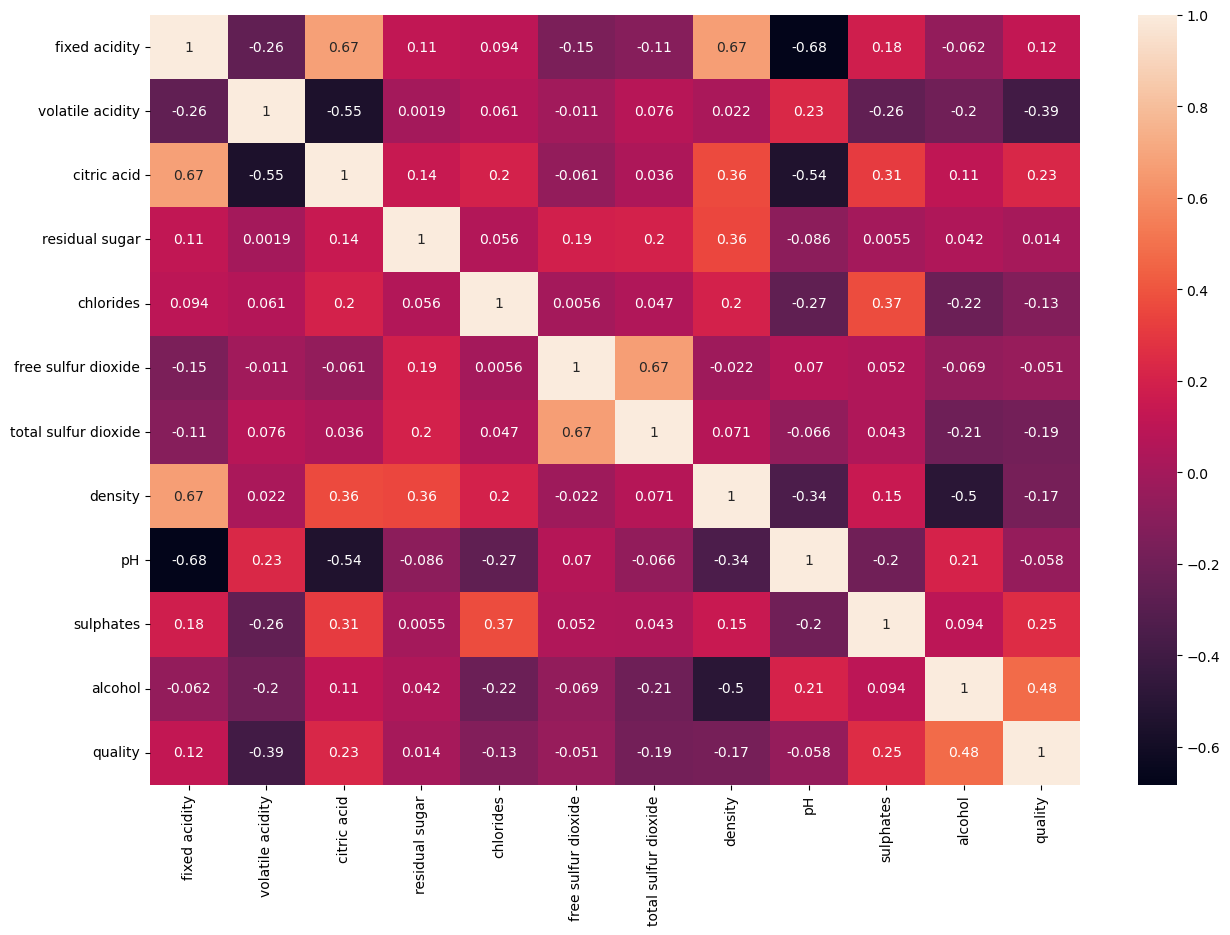

In [4]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot= True)

Alcohol,sulphate,citric acid,resedual sugar and fixed acidity are positively correlated mean increase in these variable will increase the quality. But volatile acidity,chlorides,free sulphur dioxide,total SO2, density,pH are negatively correlated means increase in these variables will decrease the quality and vice versa.

**Key features are those who are highly correlated :**

1 : Alcohol

2: Sulphates

3 : citric acid

4 : volatile acidity

Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

Here are some of the most common imputation techniques and their pros and cons:

**1.Mean or median imputation:** This technique replaces missing values with the mean or median of the non-missing values in the variable.

Advantages:

- Easy to implement.

- Preserves the sample size.

Disadvantages:

- May lead to biased estimates if the missing values are not missing at random (MAR).

- Does not account for any relationships between variables.

**2.Regression imputation:** This technique uses a regression model to predict the missing values based on the other variables in the dataset.

Advantages:

- Accounts for relationships between variables.

- Can produce more accurate estimates than mean or median imputation.Disadvantages:

- Assumes a linear relationship between variables.

- Requires a significant amount of data and computation.

**3.K-nearest neighbors (KNN) imputation:** This technique fills in missing values with the average value of the K nearest data points.

Advantages:

- Accounts for relationships between variables.

- Can handle non-linear relationships between variables.

Disadvantages:

- Can be computationally expensive.

- The value of K can significantly affect the results.

**4.Multiple imputation:** This technique generates multiple imputed datasets by filling in missing values with different estimated values based on the distribution of the non-missing values.

Advantages:

- Accounts for uncertainty in the imputation process.

- Produces more accurate estimates than single imputation methods.

Disadvantages:

- Can be computationally expensive.

Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

In [5]:
import warnings
warnings.filterwarnings('ignore')
df= pd.read_csv('stud.csv')

In [6]:
df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot: >

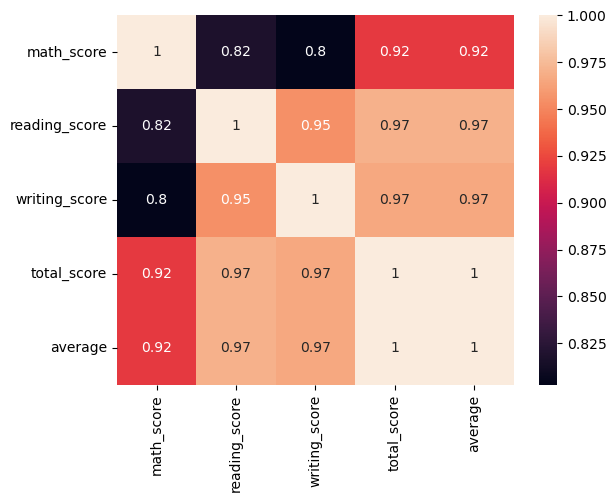

In [7]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: xlabel='average', ylabel='Count'>

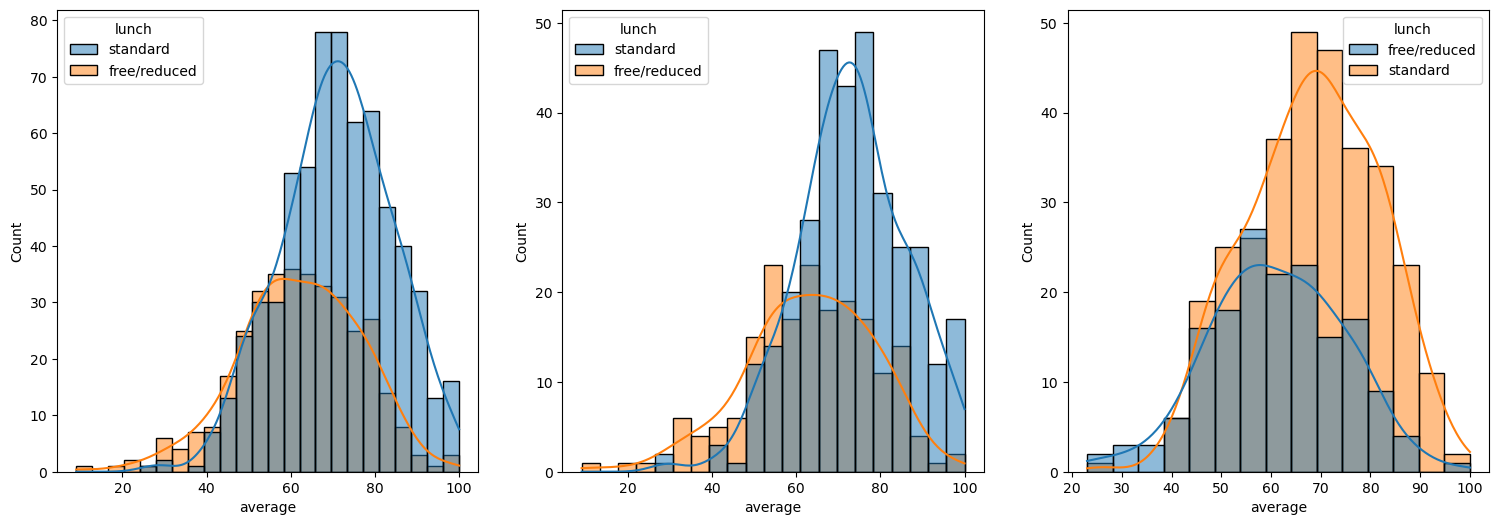

In [8]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)

sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)

sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

INSIGHT 
- Standard Lunch help students perform well in exams

<AxesSubplot: xlabel='average', ylabel='Count'>

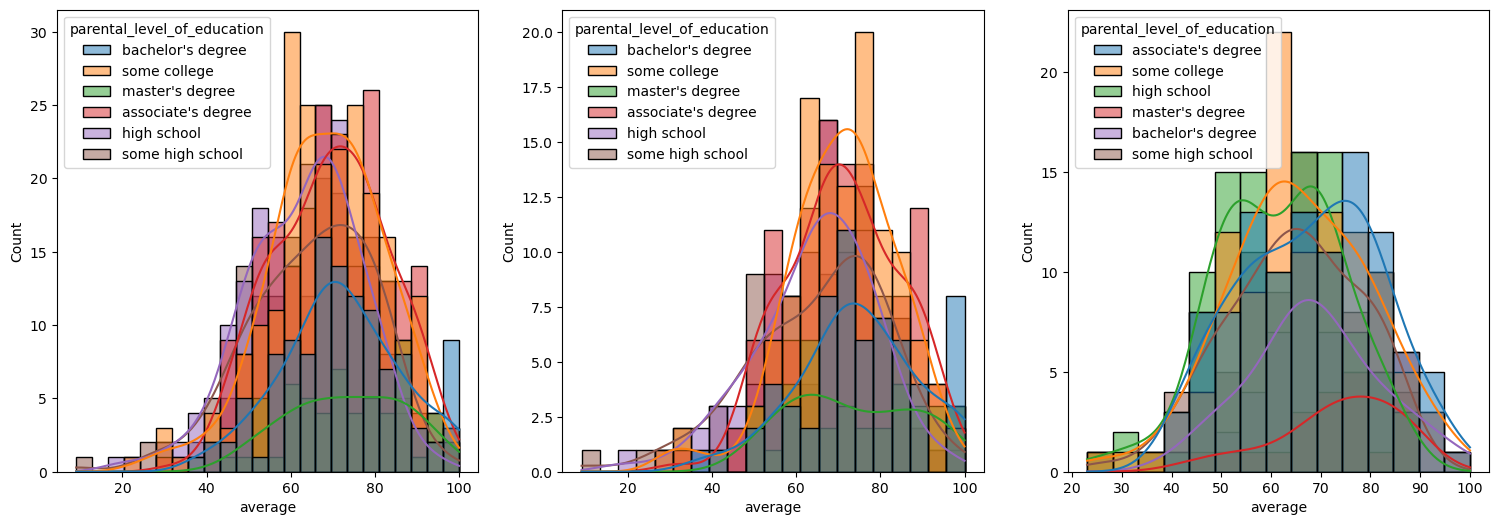

In [9]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')

INSIGHT
- In general parent's education don't help student perform well in exam.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 2nd plot we can see there is no effect of parent's education on female students.

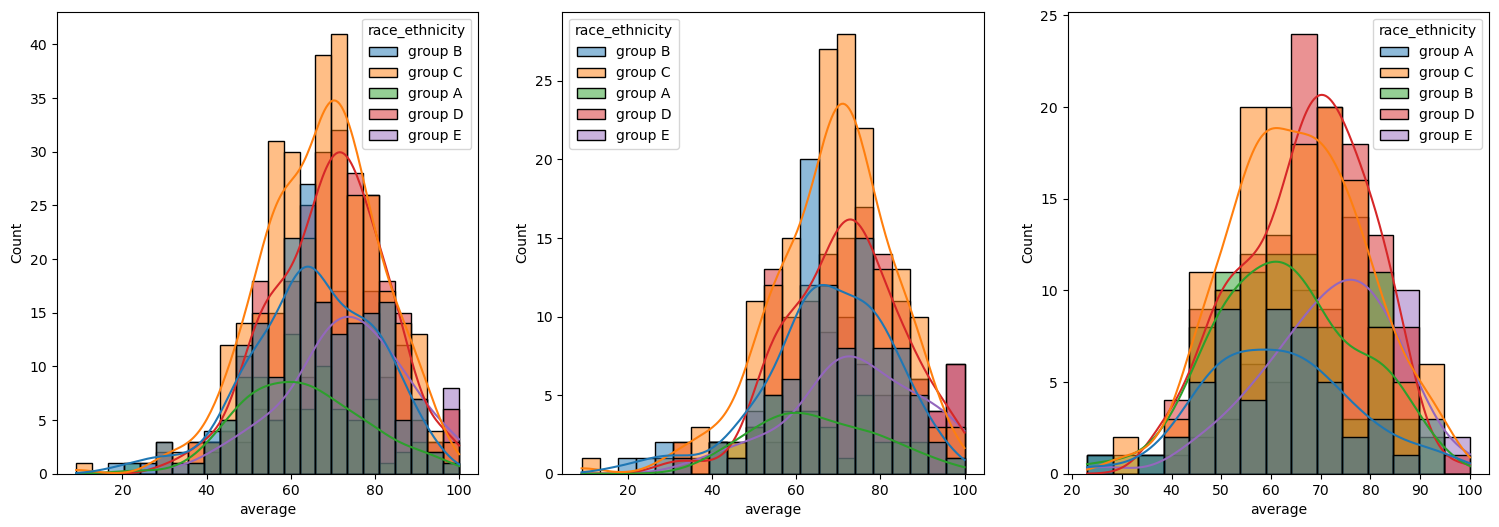

In [10]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

In the context of the student performance dataset, feature engineering involves selecting the most relevant variables that can explain the variation in student performance and transforming these variables to make them suitable for use in a machine learning model.

For this dataset, I selected the following variables to use in the model:

Gender - to investigate if gender has any effect on student performance.

Parental level of education - to investigate if the educational background of parents has any effect on student performance.

Lunch - to investigate if the type of lunch (free/reduced or standard) has any effect on student performance.

Test preparation course - to investigate if completing a test preparation course has any effect on student performance.

Math score - to investigate the correlation between math scores and overall performance.

Reading score - to investigate the correlation between reading scores and overall performance.

Writing score - to investigate the correlation between writing scores and overall performance.

To transform the variables, I used the following techniques:

One-hot encoding - for categorical variables such as gender, parental level of education, lunch, and test preparation course.

Scaling - for numerical variables such as math score, reading score, and writing score.

Feature scaling - to ensure that all variables have the same range of values, making it easier for the model to compare them.

Feature selection - to select the most relevant variables that have the most impact on student performance.

Correlation analysis - to investigate the correlation between the variables and remove any redundant or highly correlated variables.

Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load dataset
wine = pd.read_csv('winequality-red.csv')

# View first rows of the dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


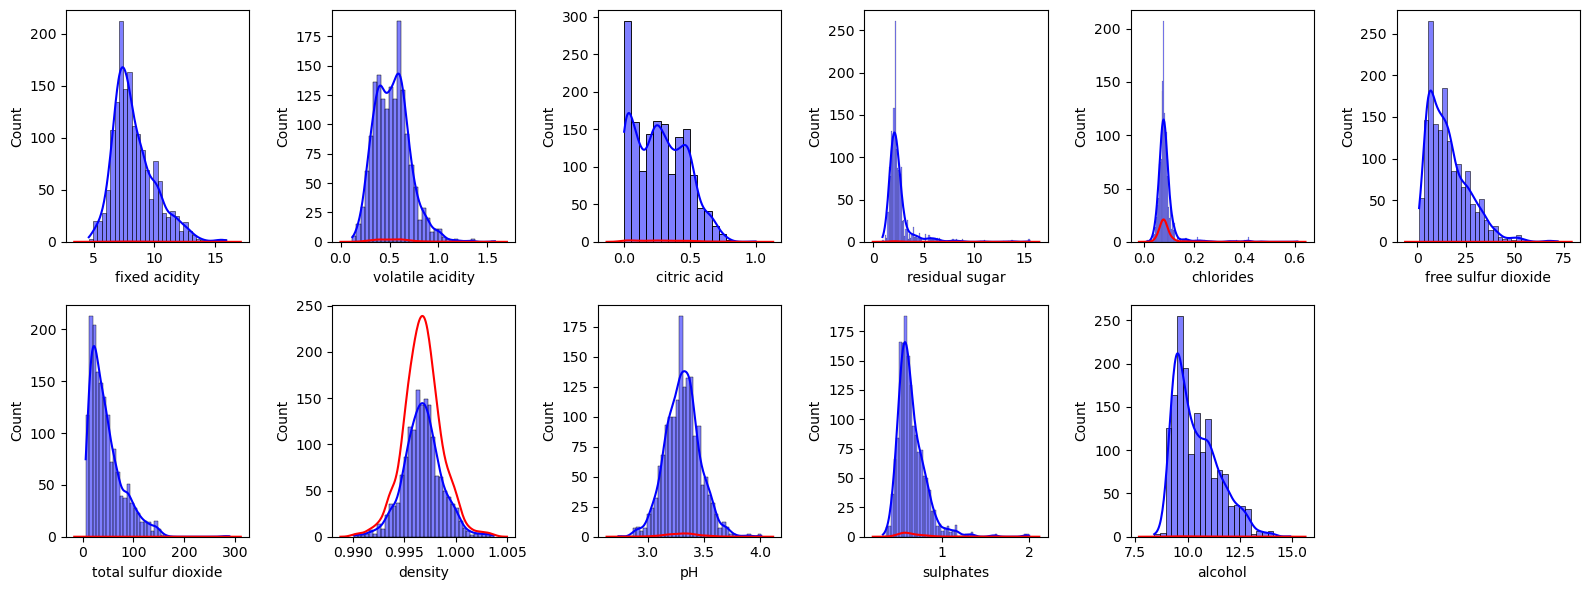

In [12]:
# Now, Let's visualize the distribution of each feature using histograms and density plots

# Create subplots for each feature
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(16, 6))
ax = ax.flatten()

# Plot histograms and density plots for each feature
for i, col in enumerate(wine.columns[:-1]):
    sns.histplot(wine[col], kde=True, ax=ax[i], color='b')
    sns.kdeplot(wine[col], ax=ax[i], color='r')

# Remove empty subplots
for i in range(11, len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

In [13]:
# 